## Converting .NC File to GEOJSON

A .NC file, also known as a NetCDF file, is a common data format used for storing multidimensional scientific data. "NC" stands for "Network Common Data Form." NetCDF files are widely used in the geosciences, atmospheric sciences, oceanography, climate research, and other scientific disciplines for storing and sharing data.


Libraries required for this notebook.
1. Geopandas - It provides data structures and operations for working with geospatial data, such as points, lines, polygons, and multi-geometry types.
2. Fiona - It is used for reading and writing geospatial data formats.
3. Xarray - It is designed for working with labeled multidimensional arrays, particularly those with dimensions representing time, space, and other coordinates. It is widely used in the geosciences and atmospheric sciences for handling climate, weather, and other environmental data. It is used to read NETCDF files.

In [ ]:
#installing libraries as these are not available as default for Collab
!pip install geopandas
!pip install geojson

In [ ]:
# importing python libraries
import pandas as pd
import numpy as np
import xarray as xr
import json
import os
import geojson
from geojson import Point, MultiPoint, Feature, FeatureCollection, dump
import geopandas as gpd

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading netcdf file using xarray library
ds=xr.open_dataset("/content/drive/MyDrive/DS Project/Omdena X Valutus/temp_yearly_85.nc")

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 31)
Coordinates:
    lon        (y, x) float32 ...
    lat        (y, x) float32 ...
  * time       (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2050-12-31
    height     float64 ...
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 ...
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-13T23:47:09ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp85
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

#### High Level info:
1. There are three dimensions (y, x, time).
2. (y,X) are used for longitude and latitude.
3. time has 31 points. From our previous knowledge we know that the range covered is a from 2020-2050. We have a time series and the data is yearly.
4. Variable is `tasAdjust` which is a mean air temperature and has values in Kelvin.
5. height is same for each variable as temperature has been measured at 2m height.

In [ ]:
# reading high-level metadata (file level information)
ds.attrs

{'CDI': 'Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'CDO': 'Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)',
 'creation_date': '2020-02-13T23:47:09ZCET+0100',
 'NCO': 'netCDF Operators version 4.7.7 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)',
 'acknowledgements': 'This work was performed within Copernicus Climate Change Service - C3S_424_SMHI, https://climate.copernicus.eu/operational-service-water-sector, on behalf of ECMWF and EU.',
 'contact': 'Hydro.fou@smhi.se',
 'data_quality': 'Testing of EURO-CORDEX data performed by ESGF nodes. In the contract C3S_424_SMHI additional tests were performed during the bias adjustment and the prodcution of the CII.',
 'domain': 'EUR-11',
 'institution': 'SMHI, www.smhi.se',
 'invar_bc_institution': 'Swedish Meteorological and Hydrological Institute',
 'invar_bc_method': 'TimescaleBC, description in deliverable C3S_D424.SMHI.1.3b',
 'invar_bc_method_id': 'Time

In [ ]:
# variable level metadata
ds['height'].attrs

{'units': 'm',
 'axis': 'Z',
 'positive': 'up',
 'long_name': 'height',
 'standard_name': 'height'}

In [ ]:
# variable level metadata
ds['tasAdjust'].attrs

{'cell_measures': 'area:areacella',
 'cell_methods': 'time:mean',
 'long_name': 'mean air temperature',
 'standard_name': 'mean_temperature_index_per_time_period',
 'units': 'K',
 'variable': 'tasAdjust'}

## Save File level and variable level metadata

For conversion of Netcdf file to GeoJSON, I'm planning to save just the

*   Geometry - Point - Longitude and Latitude
*   Feature - properties - Varaible (`tasAdjust`) and time.

In order to preserve the file level info saving the ds.attrs as metadata.json since it is originally saved as dictionary with key value pair.

In [ ]:
# function to save the metadata.
def save_metadata(ds, path):
  metadata=ds.attrs
  metadata['height']= ds['height'].attrs
  metadata['height']['value']= ds['height'].values.tolist()
  metadata['temperature']=ds['tasAdjust'].attrs
  with open(path, "w") as json_file:
    json.dump(metadata, json_file, indent=4)

  print("[...] Metadata saved as a JSON file")
  return metadata

In [ ]:
# saving the metadata
meta_path= "/content/drive/MyDrive/DS Project/Omdena X Valutus/metadata_rcp85.json"
save_metadata(ds, meta_path)

[...] Metadata saved as a JSON file


{'CDI': 'Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'CDO': 'Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)',
 'creation_date': '2020-02-13T23:47:09ZCET+0100',
 'NCO': 'netCDF Operators version 4.7.7 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)',
 'acknowledgements': 'This work was performed within Copernicus Climate Change Service - C3S_424_SMHI, https://climate.copernicus.eu/operational-service-water-sector, on behalf of ECMWF and EU.',
 'contact': 'Hydro.fou@smhi.se',
 'data_quality': 'Testing of EURO-CORDEX data performed by ESGF nodes. In the contract C3S_424_SMHI additional tests were performed during the bias adjustment and the prodcution of the CII.',
 'domain': 'EUR-11',
 'institution': 'SMHI, www.smhi.se',
 'invar_bc_institution': 'Swedish Meteorological and Hydrological Institute',
 'invar_bc_method': 'TimescaleBC, description in deliverable C3S_D424.SMHI.1.3b',
 'invar_bc_method_id': 'Time

## Saving the .NC file as CSV (Optional)

In [ ]:
# converting xarray dataset to dataframe
df=ds.to_dataframe()
df

lon        lat   tasAdjust  height
y   x   time                                                
0   0   2020-12-31  -8.229275  27.802845  295.029877     2.0
        2021-12-31  -8.229275  27.802845  295.414185     2.0
        2022-12-31  -8.229275  27.802845  295.056427     2.0
        2023-12-31  -8.229275  27.802845  295.779083     2.0
        2024-12-31  -8.229275  27.802845  295.092072     2.0
...                       ...        ...         ...     ...
949 999 2046-12-31  73.937675  58.246738         NaN     2.0
        2047-12-31  73.937675  58.246738         NaN     2.0
        2048-12-31  73.937675  58.246738         NaN     2.0
        2049-12-31  73.937675  58.246738         NaN     2.0
        2050-12-31  73.937675  58.246738         NaN     2.0

[29450000 rows x 4 columns]

In [ ]:
# resetting the index as original index is y, x and time
df.reset_index(inplace=True)

In [ ]:
df

,y,x,time,lon,lat,tasAdjust,height
0,0,0,2020-12-31,-8.229275,27.802845,295.029877,2.0
1,0,0,2021-12-31,-8.229275,27.802845,295.414185,2.0
2,0,0,2022-12-31,-8.229275,27.802845,295.056427,2.0
3,0,0,2023-12-31,-8.229275,27.802845,295.779083,2.0
4,0,0,2024-12-31,-8.229275,27.802845,295.092072,2.0
...,...,...,...,...,...,...,...
29449995,949,999,2046-12-31,73.937675,58.246738,NaN,2.0
29449996,949,999,2047-12-31,73.937675,58.246738,NaN,2.0
29449997,949,999,2048-12-31,73.937675,58.246738,NaN,2.0
29449998,949,999,2049-12-31,73.937675,58.246738,NaN,2.0


In [ ]:
# checking for duplicates
df.loc[df.duplicated()== True]

,y,x,time,lon,lat,tasAdjust,height


In [ ]:
df.duplicated().sum()

0

The data has no duplicates as confirmed form code above.

### Cleaning the time as year value
Since the time is saved as time stamp with format `yyyy-mm-dd` extracting the year form the data and saving it.

In [ ]:
df['time']=df['time'].dt.year

In [ ]:
df

,y,x,time,lon,lat,tasAdjust,height
0,0,0,2020,-8.229275,27.802845,295.029877,2.0
1,0,0,2021,-8.229275,27.802845,295.414185,2.0
2,0,0,2022,-8.229275,27.802845,295.056427,2.0
3,0,0,2023,-8.229275,27.802845,295.779083,2.0
4,0,0,2024,-8.229275,27.802845,295.092072,2.0
...,...,...,...,...,...,...,...
29449995,949,999,2046,73.937675,58.246738,NaN,2.0
29449996,949,999,2047,73.937675,58.246738,NaN,2.0
29449997,949,999,2048,73.937675,58.246738,NaN,2.0
29449998,949,999,2049,73.937675,58.246738,NaN,2.0


There are 30 million rows that is a huge number and processing this data for conversion to GeoJSON quickly exhausts system resources and leads to performance issues such as system hang or excessive memory usage.

The conversion of a .nc file to GeoJSON can involve both I/O-bound and CPU-bound aspects. The I/O-bound aspect is prominent during the reading of data from the huge .nc file, while the CPU-bound aspect arises during the processing and conversion of the data into GeoJSON format.

To address this issue, several strategies can be employed:

**Batch Processing**: Instead of processing all 30 million rows at once, breaking down the dataset into smaller batches like breaking into chunks with ds.isel(time =1, chunk_size) and processing them iteratively. This approach reduces memory consumption and minimizes the risk of system hang.

**Sampling**: Rather than processing the entire dataset, we can work on one subset that is the representation of the complete data. *But in our case our aim is to convert complete data, analysis has been done already.*

**Using data streaming libraries** : Libraries like Apache Kafka, Apache Flink, or Apache Storm, are designed for processing continuous streams of data in real-time. For my current use case I just need to store the GeoJSON file to a location, *I don't need any real-time data processing capabilities so setting up clusters and using streaming libararies for this is unnecessary.*

**Parallel Processing**: Parallel processing can significantly improve processing speed and scalability, especially for computationally intensive tasks.

This involves -
Multi-threading and multi-processing techniques involve executing multiple tasks concurrently on different CPU cores or processes. In Python, libraries such as concurrent.futures and multiprocessing provide high-level interfaces for parallelizing tasks across CPU cores. By distributing the workload across multiple cores, parallel processing can significantly improve processing speed and scalability, especially for tasks that can be executed independently in parallel.

[Setting up Spark on Docker](https://medium.com/@MarinAgli1/setting-up-a-spark-standalone-cluster-on-docker-in-layman-terms-8cbdc9fdd14b)

## Saving the Data as CSV file

In [ ]:
df.to_csv('/content/drive/MyDrive/DS Project/Omdena X Valutus/temp_rcp85.csv', index=False)

## Converting to GeoJSON

### Implementing Batch Processing to avoid system hangs beacuse of huge RAM requirement and longer processing of files 1H 20 Min appox.

Steps Involved :
1. Slicing the Xarray dataset as chunks. Each chunk represent one period of the 'time' dimension of the data.
For example, We have NetCDF file with three dimensions:
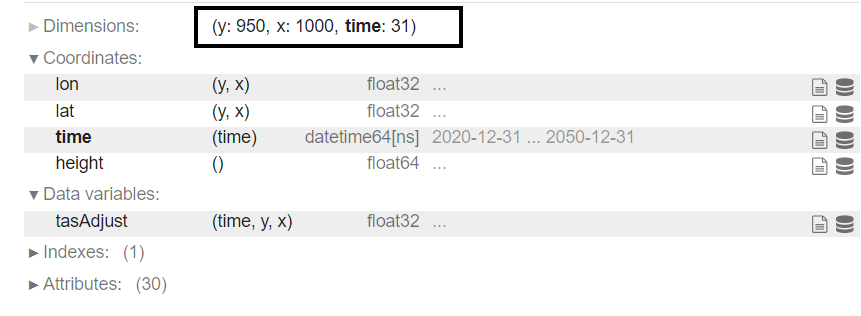


I will be slicing the ds dataset for one time period at a time.

2. I process the chunk.
  - Convert it into dataframe.
  - Transform the timestamp to just the Year.
  - Replace NaNs with None so that it can be properly encoded as JSON Null while saving it as GeoJSON
  - Iterate over each rows of chunk and save the Latitude, Longitude as 'Geometry Points' , time and Variable as 'Feature Properties'.
  
3. Used fiona library to dynamically write the GeoJSON data as it is processed for each chunk.



```
# Original Code that saves all the chunk level GeoJSON in a single file

def geo_conversion(ds, geojson_path):
    with fiona.open(geojson_path, 'w', driver='GeoJSON', schema={
        'geometry': 'Point',
        'properties': {'time': 'str', 'tasAdjust': 'float'}
    }) as dst:
        for item in range(len(ds['time'])):
            chunk = slicing_func(ds, item, chunk_size=1)
            chunk_df = chunk.to_dataframe().reset_index()
            features = process_chunk(chunk_df)
            # Write GeoJSON data to the output file using fiona
            dst.writerecords(features)

        print("[...] converted 1 file.")

    print("[...]. Files Converted to GeoJSON")
    ds.close()

```

Fiona allows you to specify a schema for the GeoJSON file, including the geometry type and properties. This ensures that the resulting GeoJSON file adheres to a specific structure and schema, which can be important for compatibility with other GIS software and applications.

- It opens a GeoJSON file for writing using Fiona (fiona.open()).
- It specifies the schema for the GeoJSON file, including the geometry type (Point) and properties (time as a string and tasAdjust as a float).
It iterates over the items in the dataset (ds['time']) and processes each item in chunks.
- For each chunk, it converts it to a DataFrame (chunk.to_dataframe()) and processes it further (process_chunk() function).
- It writes the resulting features (geospatial data) to the GeoJSON file using Fiona (dst.writerecords()).

I started with json.dumps but the format of the geojson was not saved properly for all the chunks.

In [ ]:
len(ds['time'])

31

In [ ]:
ds.isel(time=1).to_dataframe()

lon        lat   tasAdjust       time  height
y   x                                                       
0   0    -8.229275  27.802845  295.414185 2021-12-31     2.0
    1    -8.180322  27.813362  295.448212 2021-12-31     2.0
    2    -8.131361  27.823853  295.486389 2021-12-31     2.0
    3    -8.082390  27.834314  295.548737 2021-12-31     2.0
    4    -8.033411  27.844748  295.604584 2021-12-31     2.0
...            ...        ...         ...        ...     ...
949 995  73.721550  58.389679         NaN 2021-12-31     2.0
    996  73.775719  58.353977         NaN 2021-12-31     2.0
    997  73.829788  58.318253         NaN 2021-12-31     2.0
    998  73.883781  58.282505         NaN 2021-12-31     2.0
    999  73.937675  58.246738         NaN 2021-12-31     2.0

[950000 rows x 5 columns]

I'll try to save the GeoJSON futher as 5 files. Each File consisting of data for 5 years. For example file 1 has time period covered form 2020-2024.

In [ ]:
import fiona
import numpy as np
import os

def slicing_func(ds, current_pos, chunk_size=1):
    """
    Given that ds obj has time as dimension
    """
    return ds.isel(time=slice(current_pos, current_pos+chunk_size))


def process_chunk(chunk_df):
    features = []
    # preprocessing the data at chunk level

    chunk_df['time'] = chunk_df['time'].dt.year
    chunk_df.replace({np.nan: None}, inplace=True)

    for index, row in chunk_df.iterrows():
        # Extract relevant data
        time = str(row['time'])  # Convert time to string if necessary
        lat = row['lat']
        lon = row['lon']
        tasAdjust = row['tasAdjust']

        # Construct GeoJSON feature
        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [lon, lat]
            },
            "properties": {
                "time": time,
                "tasAdjust": tasAdjust
            }
        }
        features.append(feature)

    return features


def geo_conversion(ds, geojson_path):

    for item in range(0, len(ds['time']), 6):
        chunk_ds = slicing_func(ds, item, chunk_size=6)
        min_date=int(chunk_ds['time'].dt.year.min().values)
        max_date=int(chunk_ds['time'].dt.year.max().values)
        new_path= os.path.join(geojson_path, f"temperature_rcp85_{min_date}_{max_date}.geojson")
        with fiona.open(new_path, 'w', driver='GeoJSON', schema={
            'geometry': 'Point',
            'properties': {'time': 'str', 'tasAdjust': 'float'}
        }) as dst:
          for item in range(len(chunk_ds['time'])):
              chunk = slicing_func(chunk_ds, item, chunk_size=1)
              chunk_df = chunk.to_dataframe().reset_index()
              features = process_chunk(chunk_df)
              # Write GeoJSON data to the output file using fiona
              dst.writerecords(features)
              chunk_ds.close()
        print(f"[...] converted {item+1} file.")

    print("[...]. Files Converted to GeoJSON")
    ds.close()

In [ ]:
int(ds['time'].dt.year.min().values)

2020

In [ ]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count=0
for item in range(0, len(ds['time']), 6):
  chunk = slicing_func(ds, item, chunk_size=6)
  min_date=int(chunk['time'].dt.year.min().values)
  max_date=int(chunk['time'].dt.year.max().values)
  count+=1
  print(f"Data chunked from {min_date} - {max_date} for chunk - {count}")

Data chunked from 2020 - 2025 for chunk - 1
Data chunked from 2026 - 2031 for chunk - 2
Data chunked from 2032 - 2037 for chunk - 3
Data chunked from 2038 - 2043 for chunk - 4
Data chunked from 2044 - 2049 for chunk - 5
Data chunked from 2050 - 2050 for chunk - 6


In [ ]:
geojson_path= '/content/drive/MyDrive/DS Project/Omdena X Valutus/'
geo_conversion(ds, geojson_path)

[...] converted 6 file.
[...] converted 6 file.
[...] converted 6 file.
[...] converted 6 file.
[...] converted 6 file.
[...] converted 1 file.
[...]. Files Converted to GeoJSON


In [ ]:
# geojson_path= '/content/drive/MyDrive/DS Project/Omdena X Valutus/'
# min_date=2033
# max_dat=2044
# os.path.join(geojson_path, f"temperature_rcp85_{min_date}_{max_date}.geojson")

'/content/drive/MyDrive/DS Project/Omdena X Valutus/temperature_rcp85_2033_2050.geojson'

### Basic testing of the converted GeoJSON

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt



In [ ]:
# from google.colab import files
# files.download('/content/temperature_rcp45.geojson')

Reading GeoJSON file and plotting the variable for a particular time stamp.

In [ ]:
# Read the GeoJSON file
geojson_path = "/content/drive/MyDrive/DS Project/Omdena X Valutus/temperature_rcp85_2032_2037.geojson"  # Replace with your GeoJSON file path
gdf = gpd.read_file(geojson_path)



In [ ]:
gdf

,time,tasAdjust,geometry
0,2032,295.549408,POINT (-8.22927 27.80285)
1,2032,295.589325,POINT (-8.18032 27.81336)
2,2032,295.633972,POINT (-8.13136 27.82385)
3,2032,295.700897,POINT (-8.08239 27.83431)
4,2032,295.755219,POINT (-8.03341 27.84475)
...,...,...,...
5699995,2037,NaN,POINT (73.72155 58.38968)
5699996,2037,NaN,POINT (73.77572 58.35398)
5699997,2037,NaN,POINT (73.82979 58.31825)
5699998,2037,NaN,POINT (73.88378 58.28251)


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5700000 entries, 0 to 5699999
Data columns (total 3 columns):
 #   Column     Dtype   
---  ------     -----   
 0   time       object  
 1   tasAdjust  float64 
 2   geometry   geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 130.5+ MB


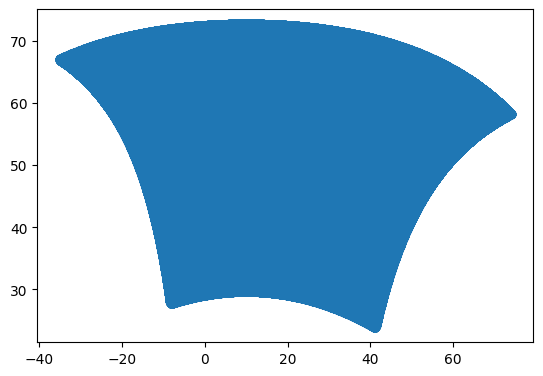

In [ ]:
import matplotlib.pyplot as plt
# Plot the GeoDataFrame
gdf.plot()
plt.show()

In [ ]:
df_0=gdf.loc[gdf['time']=='2035',:]

In [ ]:
df_0

,time,tasAdjust,geometry
2850000,2035,295.542053,POINT (-8.22927 27.80285)
2850001,2035,295.579437,POINT (-8.18032 27.81336)
2850002,2035,295.624176,POINT (-8.13136 27.82385)
2850003,2035,295.680878,POINT (-8.08239 27.83431)
2850004,2035,295.739685,POINT (-8.03341 27.84475)
...,...,...,...
3799995,2035,NaN,POINT (73.72155 58.38968)
3799996,2035,NaN,POINT (73.77572 58.35398)
3799997,2035,NaN,POINT (73.82979 58.31825)
3799998,2035,NaN,POINT (73.88378 58.28251)


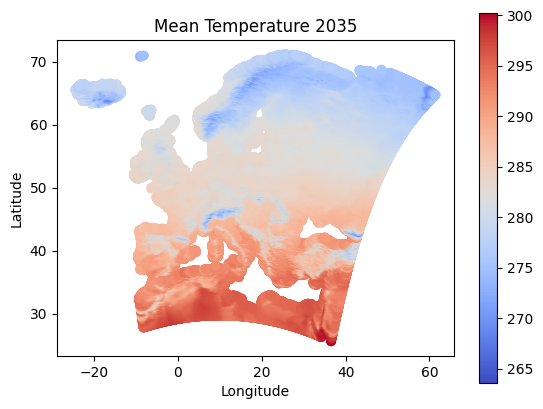

In [ ]:
import matplotlib.pyplot as plt
# Plot the GeoDataFrame
# Plot a variable from the DataFrame
df_0.plot(column='tasAdjust', cmap='coolwarm', legend=True)

plt.title(f"Mean Temperature {df_0['time'].tolist()[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()